# 개념정리

1. 클러스터(Cluster) : 비슷한 특성을 가진 데이터들끼리 묶는 것
2. 클러스터링(Clustering)
  - 데이터들을 군집으로 묶어주는 작업
  - 라벨링된 데이터를 묶는 작업으로 비지도 학습으로 분류된다
3. K-means Clustering
  - 각 클러스터에 할당된 데이터 포인터들의 평균 좌표를 이용해 중심점을 반복적으로 업데이트하여 클러스터를 형성하는 알고리즘
  - K는 군집의 개수를 의미하며 사용자가 조정해야 하는 하이퍼파라미터이다
4. 중심점, 도심(Centriod) : 클러스터의 중심
5. k-means 수행과정
  - 클러스터의 수(k) 설정 : n_clusters
  - init 파라미터의 기본값 k-means++ 방식으로 centroid1, 2, ... n개 찾음
  - centroid1에서 제일 멀리 떨어져 있는 데이터를 centroid2로 찾고
  - centroid1, 2와 제일 멀리 떨어진 데이터를 centroid3으로 찾는 방식
  - 각 데이터마다 가장 가까운 중심점에 해당하는 클러스터 할당(가장 가까운 중심점은 유클리드 거리로 찾음)
  - 할당된 클러스터를 기반으로 새로운 중심점을 계산(클러스터의 중심으로 centroid 이동, 새로운 중심점은 내부 점들의 거리의 산술평균으로 찾음)
  - 각 클러스터의 할당이 변하지 않을때까지 위의 작업을 반복수행

# 필수 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

mpl.rc('font', family = 'malgun gothic')
mpl.rc('axes', unicode_minus=False)

sns.set_style('darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore')

# 데이터셋 로딩

In [4]:
from sklearn.datasets import load_wine
wine = load_wine()

## 탐색적 데이터 분석 : EDA

In [5]:
data = wine.data
label = wine.target
columns = wine.feature_names

df = pd.DataFrame(data, columns=columns)
print(df.shape)

(178, 13)


In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## 전처리 - 피처 스케일링

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.loc[:,:] = scaler.fit_transform(data)

df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,1.746418e-17,0.000000,3.742325e-18,-2.307767e-16,-1.995907e-17,-2.681999e-17,1.534353e-16,-6.860929e-17,4.865022e-17,2.869116e-17,1.334763e-16,5.114511e-17,2.619627e-17
std,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-0.658749,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-0.423112,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,0.669793,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


## 주성분분석(PCA)를 사용해 특성 줄이기

- n_components의 입력 매개변수값에 따라 두가지 동작을 수행한다
- 만약 매개변수의 값이 1보다 크면 n_conponents 개수만큼 특성이 반환된다
- (차원이 변환된 결과가 반환된다)
- 이때, 최적의 특성 개수를 어떨게 선택할지 의문이 들 수 있다능
- 원본 특성의 95%나 99%의 분산을 유지한다는 의미로 n_components = 0.95 or 0.99를 사용함
- whiten - True로 지정하면 각 주성분의 값을 평균이 0이고, 분산이 1이 되도록 반환한다
- solver = 'randomized'는 아주 짧은 시간 안에 첫번째 주성분을 찾아주는 확률적 알고리즘을 사용한다

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data = pca.fit_transform(data)
data.shape
# 2차원으로 

(178, 2)

In [14]:
df['pca_x'] = data[:, 0]
df['pca_y'] = data[:, 1]
df.head()
# 두개의 차원이 줄어든거 확인

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,pca_x,pca_y
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831


In [16]:
# explained_variance_ratio_ : 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율
pca.explained_variance_ratio_
# pca_x와 pca_y 
# 2개의 차원을 축소하니까 합계 56%를 설명할 수 있어짐

array([0.36198848, 0.1920749 ])

## K-means로 클러스터 찾기

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=200)

In [19]:
kmeans.fit(data)

KMeans(n_clusters=3, random_state=200)

In [20]:
cluster = kmeans.predict(data)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [21]:
df['cluster'] = cluster
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,pca_x,pca_y,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831,0


<AxesSubplot:xlabel='pca_x', ylabel='pca_y'>

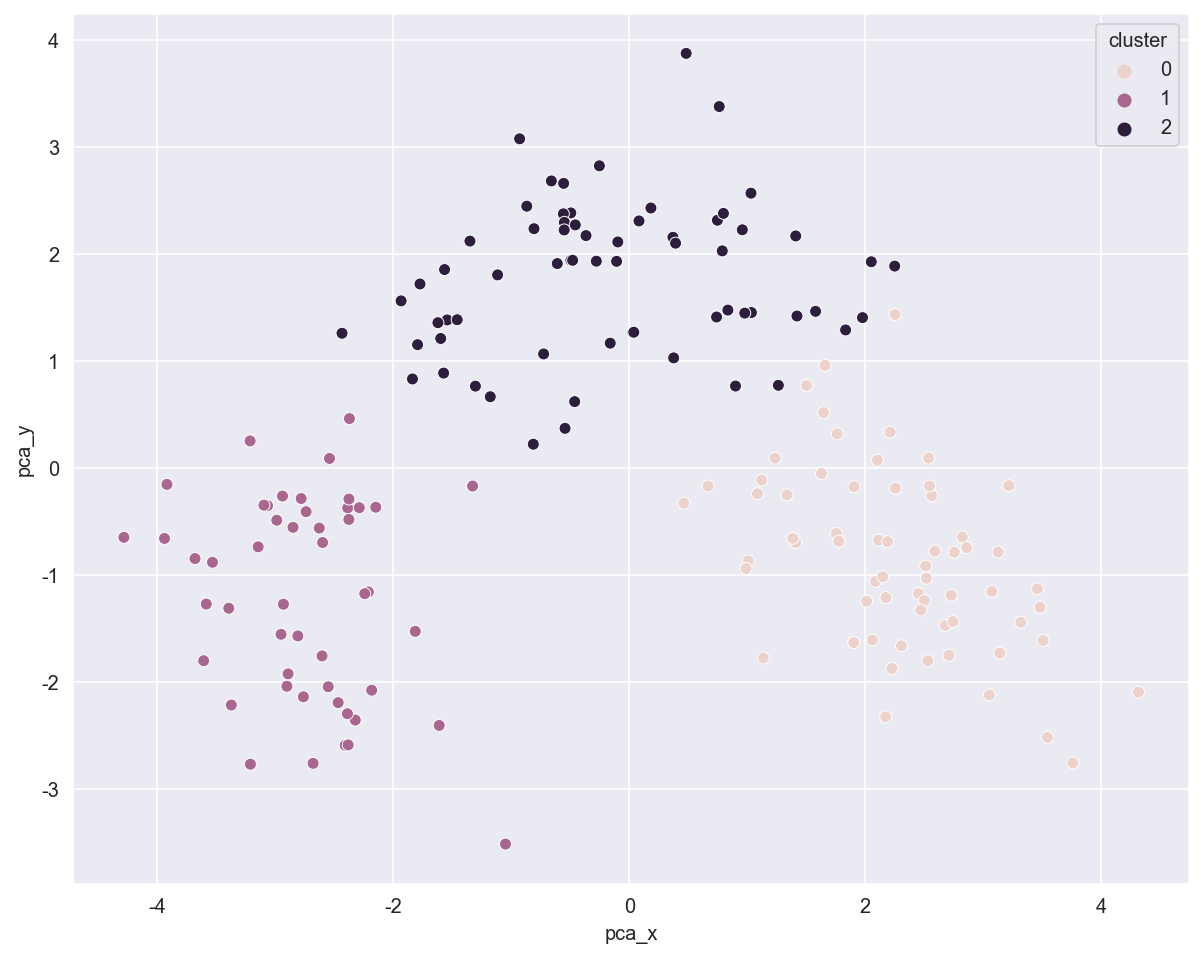

In [22]:
sns.scatterplot(x='pca_x', y='pca_y', data=df, hue='cluster')

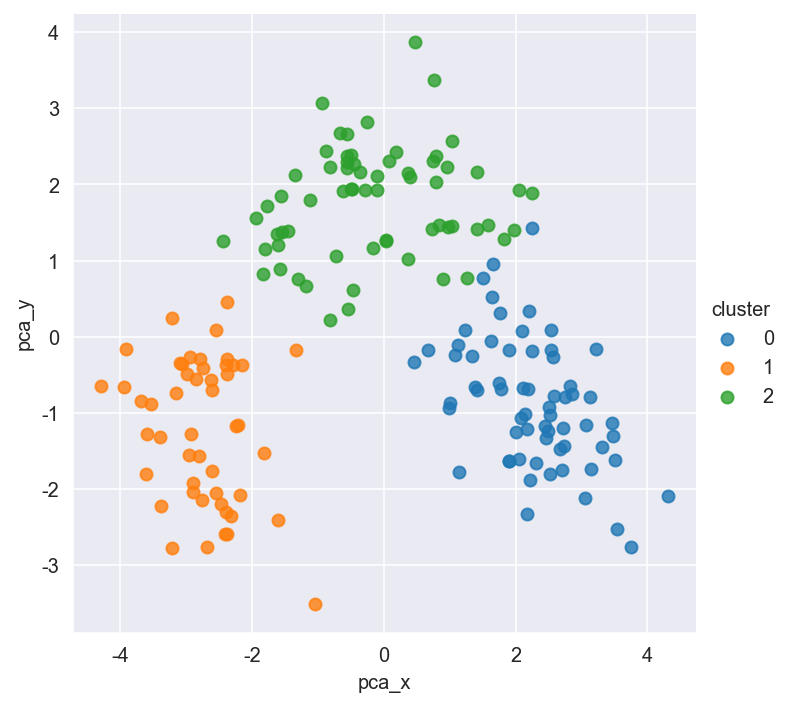

In [23]:
sns.lmplot(x='pca_x', y='pca_y', data=df, hue='cluster', fit_reg=False)
# 나름 군집을 잘 이루고잇어보임

## 중심점도 포함한 시각화 구현하기

In [24]:
# cluster_centers_ : 중심점의 좌표값이 저장되어 있다
center = kmeans.cluster_centers_
center
# x축 y축

array([[ 2.26614991, -0.86559213],
       [-2.74392982, -1.2141906 ],
       [-0.16278513,  1.76758824]])

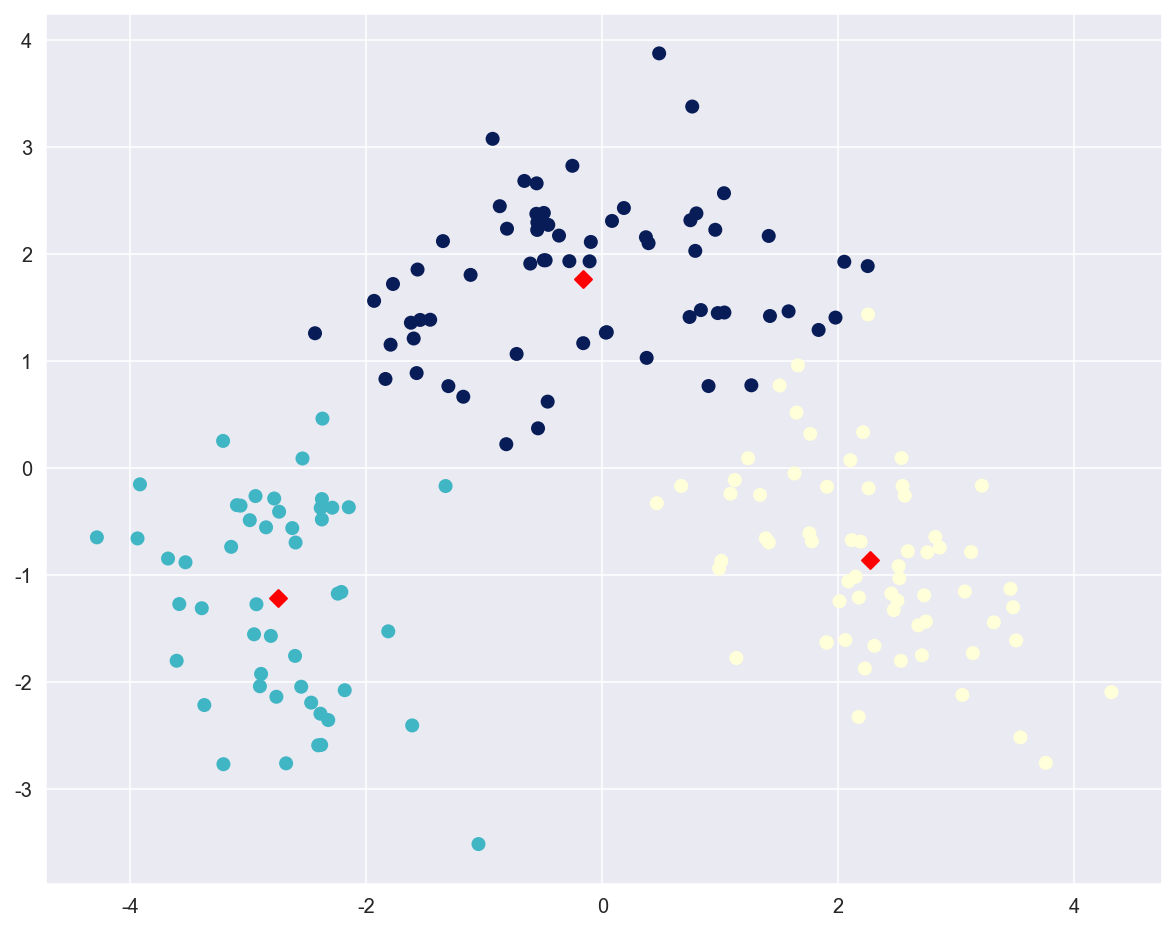

In [26]:
plt.scatter(df['pca_x'], df['pca_y'], c=df['cluster'], cmap='YlGnBu')
plt.scatter(center[:, 0], center[:, 1], c='red', marker='D')
# 중심점 찍기, x축, y축 순

## 적절한 군집의 수, K는 어떻게 정할까요? 최적의 K찾기

- K-means 알고리즘의 단점 중 하나는 클러스터의 개수를 사전에 지정해야 한다는 점이다
- 사실 군집 알고리즘에서 적절한 k를 찾기 위한 완벽한 방법은 없다. 다만, 대표적인 방법중 하나인 엘보우 방법이 존재한다

## Elbow Method

- K-means 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있다
- 이 거리의 제곱의 합은 이너셔(inertia)라고 부른다
- 이너셔(inertia) : 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값
- 클러스터의 갯수가 줄면 거리는 늘어나고
- 클러스터의 갯수가 늘면 거리는 줄어듦
- 이너셔와 관련이 있다는 말
- 일반적으로 클러스터의 개수가 늘어나면 클러스터 각각의 거리는 줄어들기 때문에 이너셔도 줄어든다
<br></br>
- 엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법이다
- 클러스터 개수를 증가시키면서 이너셔를 시각화하면 감소하는 속도가 꺾이는 지점이 있다. 이 지점부터 클러스터 개수를 늘려고 클러스터에 잘 밀집된 정도가 크게 개선되지 않는다. 즉, 이너셔가 크게 줄어들지 않는다. 이 지점이 마치 팔꿈치 모양이어서 엘보우 방법이라고 부른다.
- k-means 클래스틑 자동으로 이너셔를 계산해서 inertia_ 속성에 담아 제공한다
<br></br>
- 더이상 군집할 데이터가 존재하지 않거나, 군집해도 큰 의미가 없다고 계산될때 그래프가 꺾어짐 => 적절한 K (그 모습이 사람 팔꿈치와 닮아서 엘보우라고 함)

In [27]:
inertia = []

# k값을 2 ~ 16까지 만들겟단 뜻
for k in range(2, 16):
    km = KMeans(n_clusters=k, random_state=200)
    km.fit(data)
    iner = km.inertia_
    inertia.append(iner)
    
    print('k :  ', k, ' ', 'cost : ', iner)
    
inertia = np.array(inertia)

k :   2   cost :  628.7883507554778
k :   3   cost :  259.50938075119336
k :   4   cost :  192.39061530234855
k :   5   cost :  155.06920474891723
k :   6   cost :  123.43287973008762
k :   7   cost :  99.24814548387035
k :   8   cost :  90.05279491709494
k :   9   cost :  80.7428691759191
k :   10   cost :  73.42282923968276
k :   11   cost :  65.34374421996388
k :   12   cost :  59.449212939927705
k :   13   cost :  57.450190324722506
k :   14   cost :  51.071654202854376
k :   15   cost :  48.136574601254345


## Elbow 시각화(inertia)

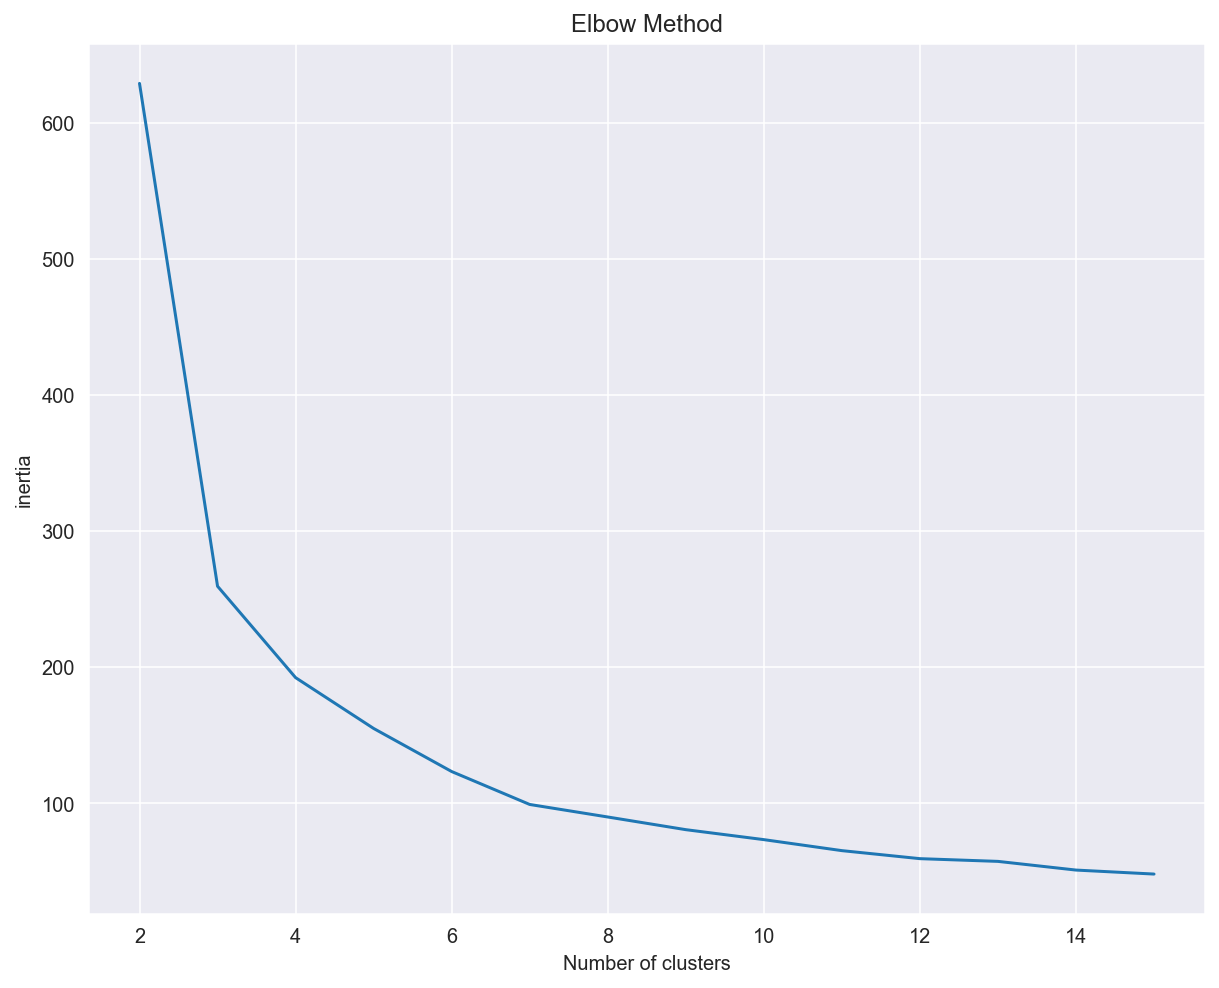

In [28]:
plt.plot(range(2, 16), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()
# 그래프에서 딱 꺾어지는 부분을 확인할 수 있음

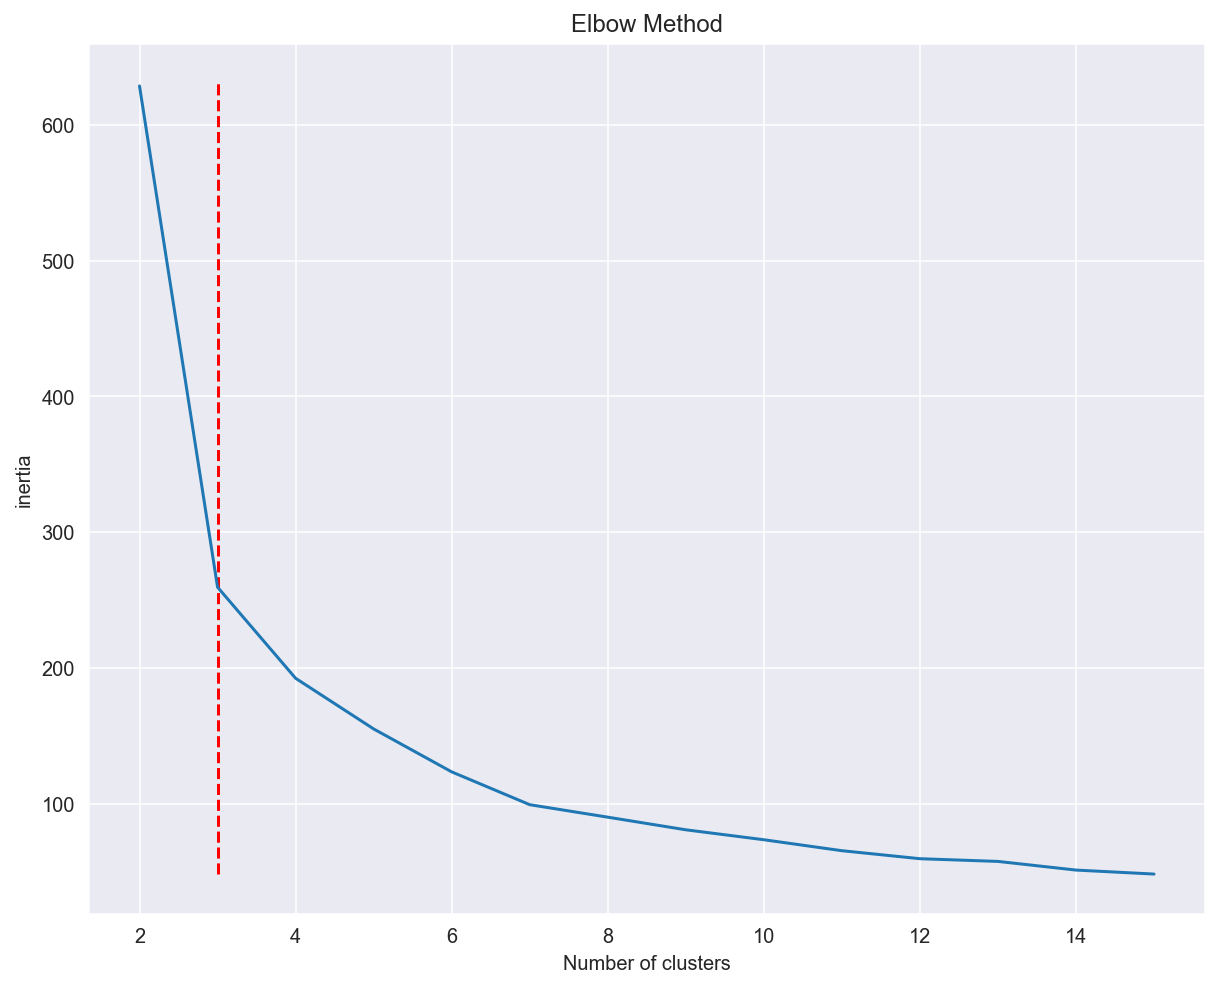

In [30]:
plt.plot(range(2, 16), inertia)
plt.vlines(3, ymin=inertia.min()*0.9999, ymax=inertia.max()*1.003, linestyle='--', color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

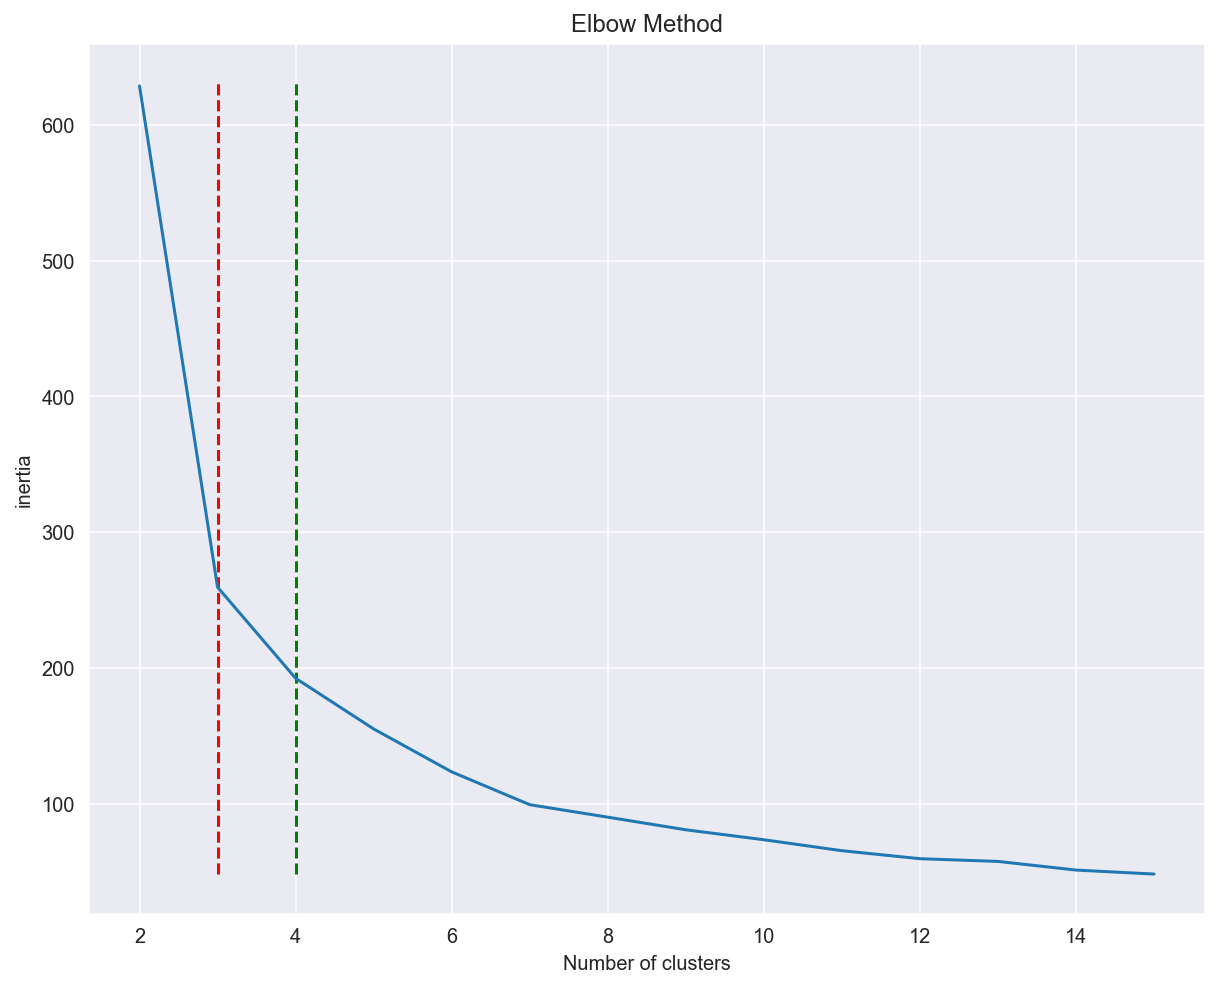

In [33]:
plt.plot(range(2, 16), inertia)
plt.vlines(3, ymin=inertia.min()*0.9999, ymax=inertia.max()*1.003, linestyle='--', color='red')
plt.vlines(4, ymin=inertia.min()*0.9999, ymax=inertia.max()*1.003, linestyle='--', color='green')
# 0.9999같은 숫자는 걍 이쁘게 보이려고 한거임. min max에 한거임
# 3을 쓰는 사람도 있고 4를 쓰는 사람도 있음
# 3과4중 뭘 쓸지 고를때(?) 실루엣 분석을 쓴다나
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

## 군집평가

- 군집화는 분류와 유사해보이지만 성격이 많이 다르다
- 데이터 내에 숨어있는 별도의 그룹을 찾아서 의미를 부여한다
- 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하기도 한다
- 이러한 군집화가 효퓽적으로 잘 되었는지 평가할 수 있는 대표적인 방법에 실루엣 분석이 있다
- 다만, 비지도학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기 어렵다

## 실루엣 분석

- 실루엣 분석은 다른 군집과의 거리는 떨어져 있고 동일 군집 데이터끼리 서로 가까운지를 나타낸다
- 실루엣 분석은 실루엣 계수를 기반으로 하며 실루엣 계수는 개별 데이터가 가지는 군집화 지표이다
- 실루엣 계수의 평균값이 1에 가까울수록 군집화가 잘 되었다고 판단한다.
- 비지도 학습은 정답이 없으므로 우리가 판단한다

In [35]:
# train test 분리해도 될 것 같다
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,label,random_state=200)

In [42]:
from sklearn.metrics import silhouette_score

k_range = range(2, 30)
# 데이터가 많아지면 시간이 오래걸리는 단점


# 최적의 k값과 최적의 실루엣값을 찾을거임
best_k = -1
best_silhouette_score = -1

for k in k_range:
    km = KMeans(n_clusters = k, random_state=200)
    km.fit(data)
    # 데이터를 나눈다면 여기에 트레이닝 데이터를 담아도 됨
    clusters = km.predict(data)
    
    score = silhouette_score(data, clusters)
    # 데이터와 예측값을 가지고 score를 구함
    
    print('k : ', k, 'score : ', score)
    
    if score > best_silhouette_score:
        best_k = k
        best_silhouette_score = score
        # ~~가 ~~보다 크면
        # 그때의 k값이 베스트k
        # 그때의 스코어가 베스트실루엣스코어
        
print('\n best k : ', best_k, 'best score : ', best_silhouette_score)

k :  2 score :  0.464914090892015
k :  3 score :  0.5610505693103248
k :  4 score :  0.49142133957103173
k :  5 score :  0.4411644097008515
k :  6 score :  0.44631751360554134
k :  7 score :  0.42357060607218666
k :  8 score :  0.40253364286993976
k :  9 score :  0.3993990585943548
k :  10 score :  0.3839746584864296
k :  11 score :  0.41761241227831336
k :  12 score :  0.40736052501863074
k :  13 score :  0.3936131054984268
k :  14 score :  0.3934456673409443
k :  15 score :  0.3672030741146195
k :  16 score :  0.39862565386464743
k :  17 score :  0.37053763207561213
k :  18 score :  0.3914695343764404
k :  19 score :  0.38071738669237326
k :  20 score :  0.387155672047471
k :  21 score :  0.3822013456814121
k :  22 score :  0.36282361234201166
k :  23 score :  0.3811925221744517
k :  24 score :  0.36956710822998723
k :  25 score :  0.3821068977395496
k :  26 score :  0.3505179707835091
k :  27 score :  0.36824202349849694
k :  28 score :  0.3457859618582358
k :  29 score :  0.3703393

In [41]:
from sklearn.metrics import silhouette_score

k_range = range(2,30)

best_k = -1
best_silhouette_score = -1

for k in k_range:
    km = KMeans(n_clusters=k, random_state = 200)
    km.fit(data)
    clusters = km.predict(data)

    score = silhouette_score(data, clusters)

    print('k:', k, 'score::', score)
    
    if score > best_silhouette_score:
        best_k = k
        best_silhouette_score = score

print('\n best k:', best_k, 'best score:', best_silhouette_score)

k: 2 score:: 0.464914090892015
k: 3 score:: 0.5610505693103248
k: 4 score:: 0.49142133957103173
k: 5 score:: 0.4411644097008515
k: 6 score:: 0.44631751360554134
k: 7 score:: 0.42357060607218666
k: 8 score:: 0.40253364286993976
k: 9 score:: 0.3993990585943548
k: 10 score:: 0.3839746584864296
k: 11 score:: 0.41761241227831336
k: 12 score:: 0.40736052501863074
k: 13 score:: 0.3936131054984268
k: 14 score:: 0.3934456673409443
k: 15 score:: 0.3672030741146195
k: 16 score:: 0.39862565386464743
k: 17 score:: 0.37053763207561213
k: 18 score:: 0.3914695343764404
k: 19 score:: 0.38071738669237326
k: 20 score:: 0.387155672047471
k: 21 score:: 0.3822013456814121
k: 22 score:: 0.36282361234201166
k: 23 score:: 0.3811925221744517
k: 24 score:: 0.36956710822998723
k: 25 score:: 0.3821068977395496
k: 26 score:: 0.3505179707835091
k: 27 score:: 0.36824202349849694
k: 28 score:: 0.3457859618582358
k: 29 score:: 0.3703393807908475

 best k: 3 best score: 0.5610505693103248
